# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

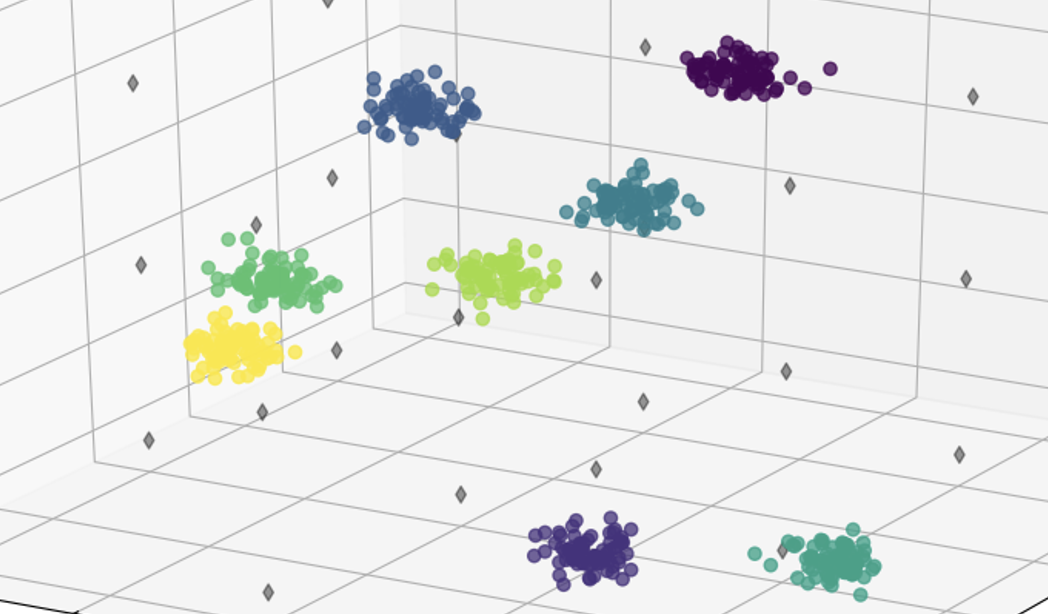

In [19]:
np.random.seed(42)

n_zrazku_heneratii_2_samples = 500 

class_1x = np.random.normal(loc=-2, scale=1, size=n_zrazku_heneratii_2_samples)
class_1y = np.random.normal(loc=-2, scale=1, size=n_zrazku_heneratii_2_samples)
class_1 = np.ones(n_zrazku_heneratii_2_samples)

class_2x = np.random.normal(loc=2, scale=1, size=n_zrazku_heneratii_2_samples)
class_2y = np.random.normal(loc=2, scale=1, size=n_zrazku_heneratii_2_samples)
class_2 = np.zeros(n_zrazku_heneratii_2_samples)

x = np.concatenate([class_1x, class_2x])
y = np.concatenate([class_1y, class_2y])
classes = np.concatenate([class_1, class_2])

In [3]:
data = pd.DataFrame({
    'x': x,
    'y': y,
    'class': classes
})

data.head()

,x,y,class
0,-1.503286,-1.073822,1.0
1,-2.138264,-0.090583,1.0
2,-1.352311,-3.398568,1.0
3,-0.476970,-1.437031,1.0
4,-2.234153,-2.650643,1.0


In [4]:
data.to_csv('syntheticData.csv', index=False)
print("file save: 'syntheticData.csv'")

file save: 'syntheticData.csv'


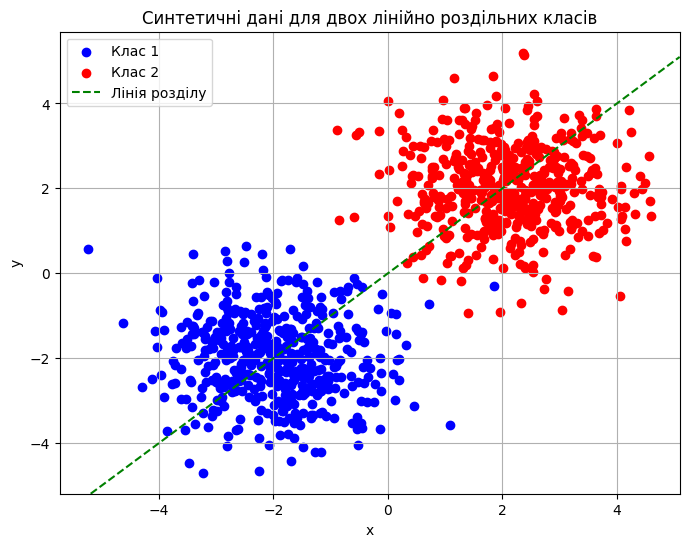

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(class_1x, class_1y, color='blue', label='Клас 1')
plt.scatter(class_2x, class_2y, color='red', label='Клас 2')
plt.axline((-1, -1), slope=1, color='green', linestyle='--', label='Лінія розділу')
plt.legend()
plt.title('Синтетичні дані для двох лінійно роздільних класів')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.


1. використав для генерації нормальний розподіл. перший ((-2, -2)) , другий (2, 2) .для кожного 500 зразків.
2. обєднав координати (x, y) та мітки класів у DataFrame і зберіг у syntheticData.csv
3. перший класс - сині точки , для другого класу - червоні точки.

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

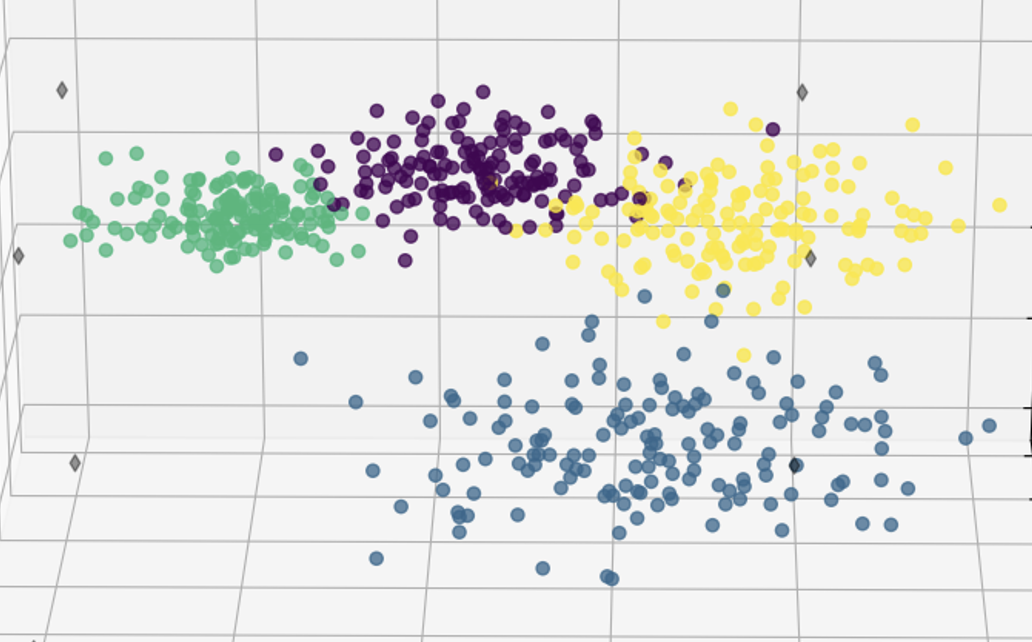

In [6]:
np.random.seed(42)
n_zrazku_heneratii_3_samples = 300

class_1x = np.random.normal(loc=0, scale=1.0, size=n_zrazku_heneratii_3_samples)
class_1y = np.random.normal(loc=0, scale=1.0, size=n_zrazku_heneratii_3_samples)

class_2x = np.random.normal(loc=2, scale=1.0, size=n_zrazku_heneratii_3_samples)
class_2y = np.random.normal(loc=2, scale=1.0, size=n_zrazku_heneratii_3_samples)

class_3x = np.random.normal(loc=-2, scale=1.0, size=n_zrazku_heneratii_3_samples)
class_3y = np.random.normal(loc=2, scale=1.0, size=n_zrazku_heneratii_3_samples)

x = np.concatenate([class_1x, class_2x, class_3x])
y = np.concatenate([class_1y, class_2y, class_3y])
classes = np.concatenate([np.ones(n_zrazku_heneratii_3_samples), np.ones(n_zrazku_heneratii_3_samples)*2, np.ones(n_zrazku_heneratii_3_samples)*3])

data = pd.DataFrame({'x': x, 'y': y, 'class': classes})
data.to_csv('syntheticThreeClassData.csv', index=False)

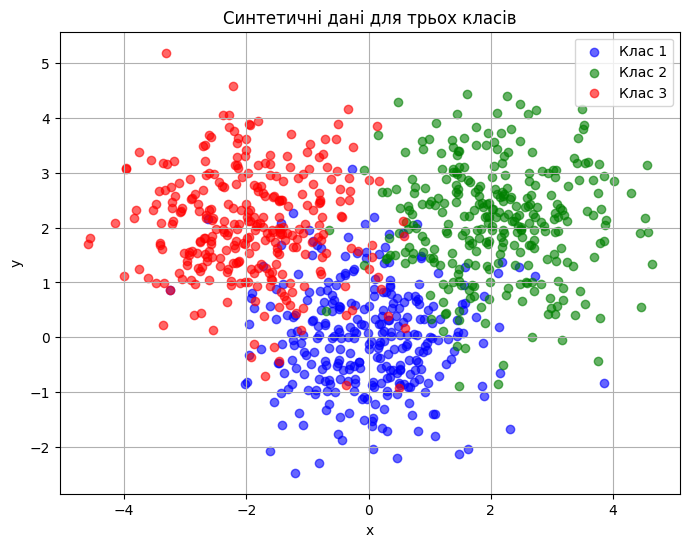

In [7]:
plt.figure(figsize=(8, 6))

plt.scatter(class_1x, class_1y, color='blue', label='Клас 1', alpha=0.6)
plt.scatter(class_2x, class_2y, color='green', label='Клас 2', alpha=0.6)
plt.scatter(class_3x, class_3y, color='red', label='Клас 3', alpha=0.6)

plt.title('Синтетичні дані для трьох класів')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

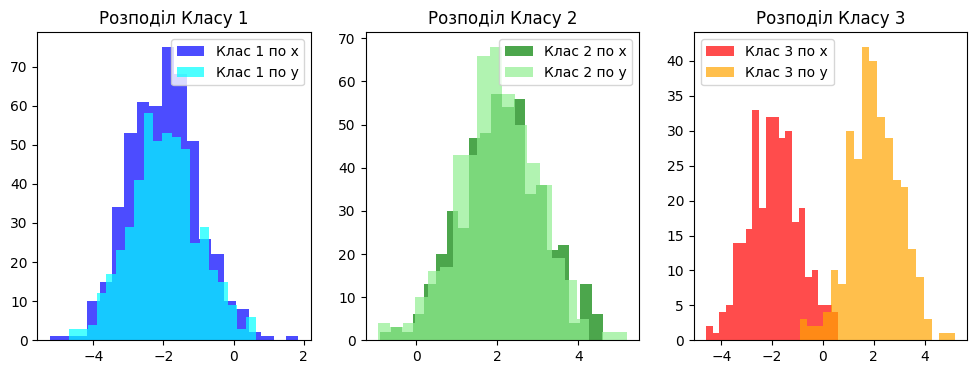

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(class_1x, bins=20, alpha=0.7, label='Клас 1 по x', color='blue')
plt.hist(class_1y, bins=20, alpha=0.7, label='Клас 1 по y', color='cyan')
plt.title('Розподіл Класу 1')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(class_2x, bins=20, alpha=0.7, label='Клас 2 по x', color='green')
plt.hist(class_2y, bins=20, alpha=0.7, label='Клас 2 по y', color='lightgreen')
plt.title('Розподіл Класу 2')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(class_3x, bins=20, alpha=0.7, label='Клас 3 по x', color='red')
plt.hist(class_3y, bins=20, alpha=0.7, label='Клас 3 по y', color='orange')
plt.title('Розподіл Класу 3')
plt.legend()

plt.show()

Кореляція між x та y:
          x        y
x  1.00000  0.01613
y  0.01613  1.00000


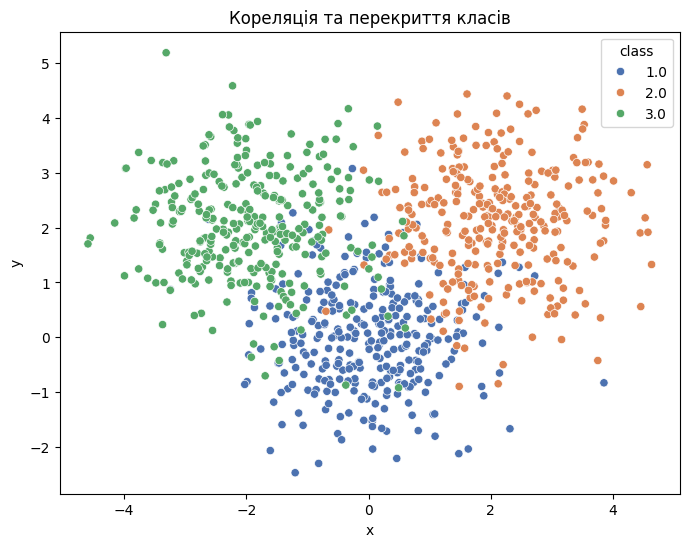

In [9]:
corr = data[['x', 'y']].corr()
print("Кореляція між x та y:\n", corr)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='x', y='y', hue='class', palette='deep')
plt.title('Кореляція та перекриття класів')
plt.show()

- Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
- Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

1. для набору данних використав наормальний розподіл із центроїдами для кожного класу: (0, 0), (2, 2) і (-2, 2)
2. було вибрано стандартне відхилення 1.0 для підвищення перекриття між класами (для достатньої змішуванності точок різних класів)

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

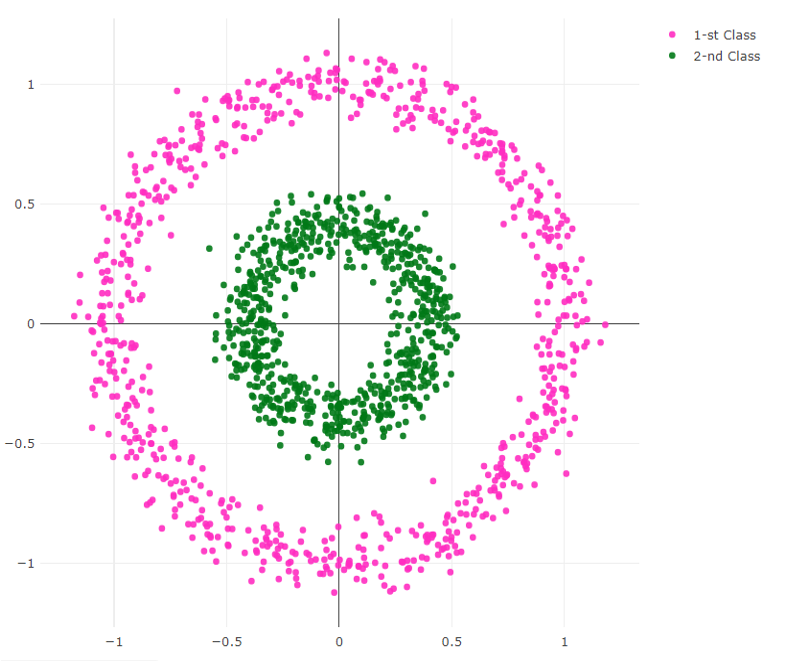

In [10]:
np.random.seed(42)
n_torVtori_heneratii_samples = 500

r_inner = 1
r_outer = 3 

width_inner = 0.3 
width_outer = 0.5

theta_inner = np.linspace(0, 2 * np.pi, n_torVtori_heneratii_samples)
theta_outer = np.linspace(0, 2 * np.pi, n_torVtori_heneratii_samples)

x_inner = (r_inner + width_inner * np.random.randn(n_torVtori_heneratii_samples)) * np.cos(theta_inner)
y_inner = (r_inner + width_inner * np.random.randn(n_torVtori_heneratii_samples)) * np.sin(theta_inner)

x_outer = (r_outer + width_outer * np.random.randn(n_torVtori_heneratii_samples)) * np.cos(theta_outer)
y_outer = (r_outer + width_outer * np.random.randn(n_torVtori_heneratii_samples)) * np.sin(theta_outer)

class_1_Vnyt = np.ones(n_torVtori_heneratii_samples)
class_2_3ovn = np.zeros(n_torVtori_heneratii_samples) 

In [11]:
x = np.concatenate([x_inner, x_outer])
y = np.concatenate([y_inner, y_outer])
classes = np.concatenate([class_1_Vnyt, class_2_3ovn])

data = pd.DataFrame({
    'x': x,
    'y': y,
    'class': classes
})

data.head()

,x,y,class
0,1.149014,0.000000,1.0
1,0.958445,0.019804,1.0
2,1.193928,0.014615,1.0
3,1.455870,0.044144,1.0
4,0.928575,0.040518,1.0


In [12]:
data.to_csv('tor_in_tor_data.csv', index=False)
print("file Save: 'tor_in_tor_data.csv'")

file Save: 'tor_in_tor_data.csv'


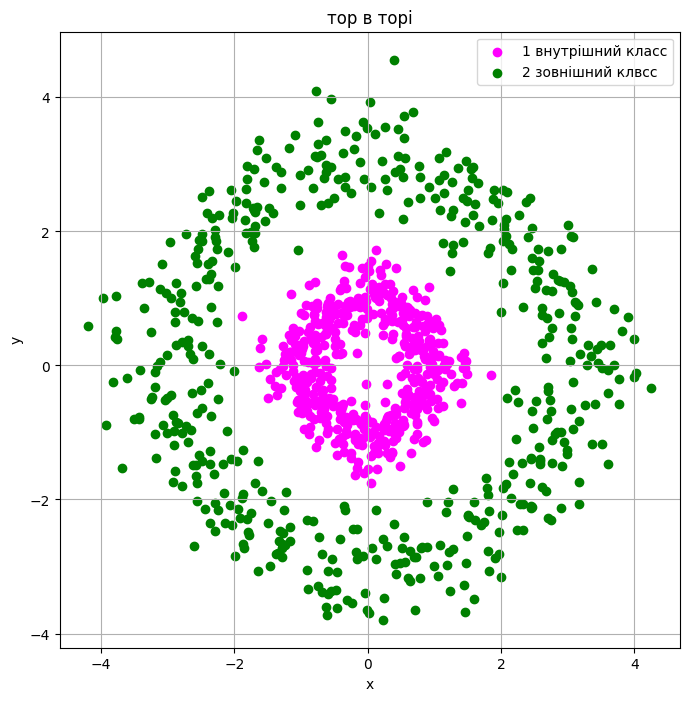

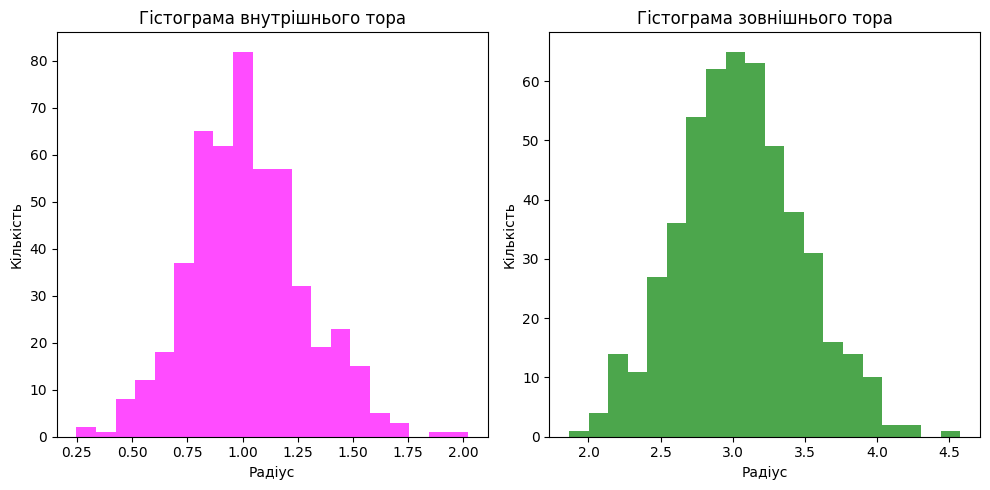

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(x_inner, y_inner, color='magenta', label='1 внутрішний класс')
plt.scatter(x_outer, y_outer, color='green', label='2 зовнішний клвсс')
plt.legend()
plt.title('тор в торі')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

r_inner_data = np.sqrt(x_inner**2 + y_inner**2)
r_outer_data = np.sqrt(x_outer**2 + y_outer**2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(r_inner_data, bins=20, color='magenta', alpha=0.7)
plt.title('Гістограма внутрішнього тора')
plt.xlabel('Радіус')
plt.ylabel('Кількість')

plt.subplot(1, 2, 2)
plt.hist(r_outer_data, bins=20, color='green', alpha=0.7)
plt.title('Гістограма зовнішнього тора')
plt.xlabel('Радіус')
plt.ylabel('Кількість')

plt.tight_layout()
plt.show()

- Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
- Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

1. для внутрішнього тора я вибрав менший радіус 1 одиниця ті ширину 0,3 одиниці, для більш щільного розподілу точок у центрі. Для зовнішнього тора (3 і 0,5 одиниць).
2. використав рівномірний розподіл для генерації по кутам точок для кожного тора. 

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

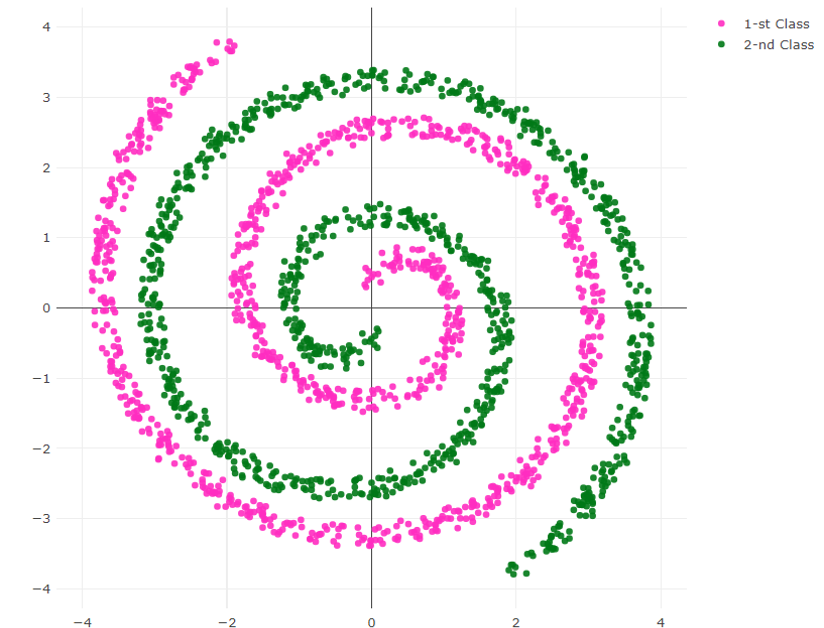

In [14]:
n_spiral_points = 500
noise = 0.2

n = np.sqrt(np.random.rand(n_spiral_points)) * 780 * (2 * np.pi) / 360
d1x = -np.cos(n) * n + np.random.rand(n_spiral_points) * noise
d1y = np.sin(n) * n + np.random.rand(n_spiral_points) * noise

d2x = np.cos(n) * n + np.random.rand(n_spiral_points) * noise
d2y = -np.sin(n) * n + np.random.rand(n_spiral_points) * noise

data1 = np.vstack((d1x, d1y)).T
data2 = np.vstack((d2x, d2y)).T

data = np.vstack((data1, data2))
labels = np.hstack((np.zeros(n_spiral_points), np.ones(n_spiral_points)))


In [15]:
df = pd.DataFrame(data, columns=['x', 'y'])
df['class'] = labels

df.to_csv('spiralData.csv', index=False)

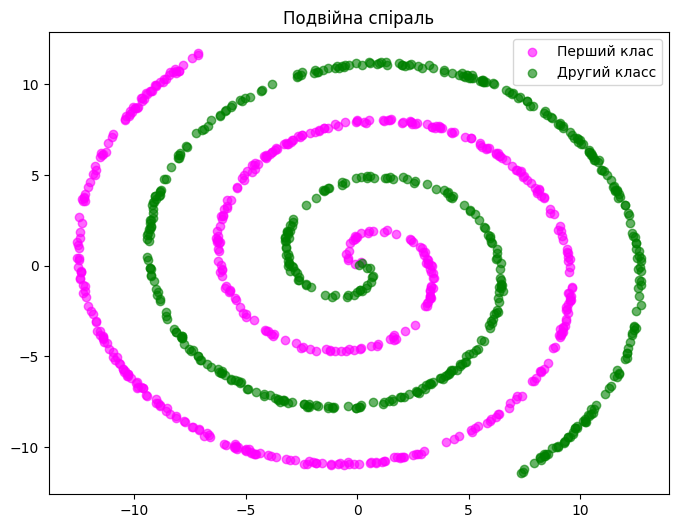

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], color='magenta', label='Перший клас', alpha=0.6)
plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], color='green', label='Другий класс', alpha=0.6)
plt.legend()
plt.title("Подвійна спіраль")
plt.show()

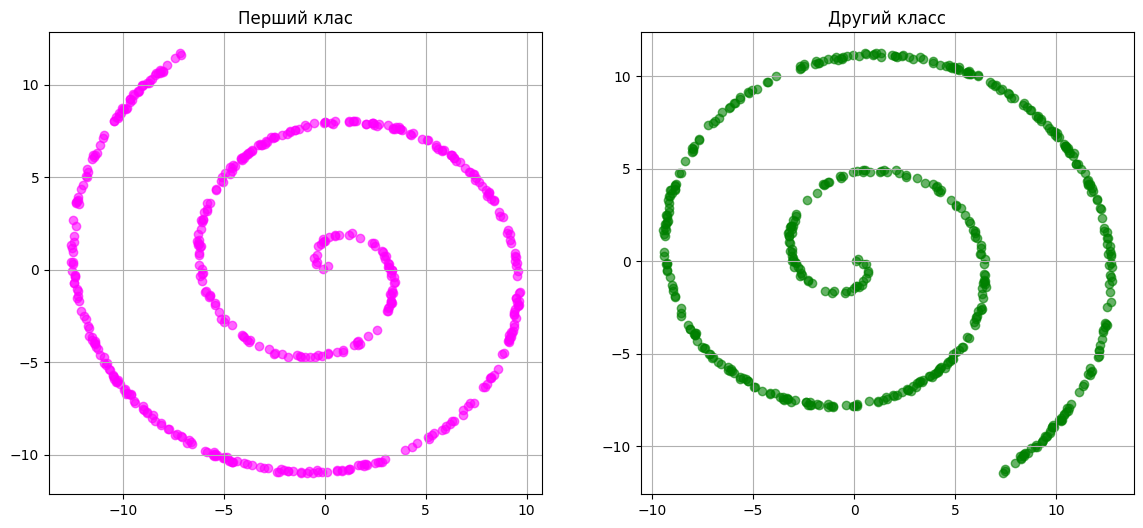

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], color='magenta', label='1-й Клас', alpha=0.6)
axs[0].set_title('Перший клас')
axs[0].grid(True)

axs[1].scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], color='green', label='2-й Клас', alpha=0.6)
axs[1].set_title('Другий класс')
axs[1].grid(True)

plt.show()

- Створіть окремі графіки, що показують як закручується кожна спіраль.
- Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

1. для кожної спіралі використовується полярна система координат. n відповідає куту радіанам.
2. перший класс: 
    - x = -cos(n)*n ,
    - y = sin(n)*n
2. другий класс:
    - x = cos(n)*n ,
    - y = -sin(n)*n

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

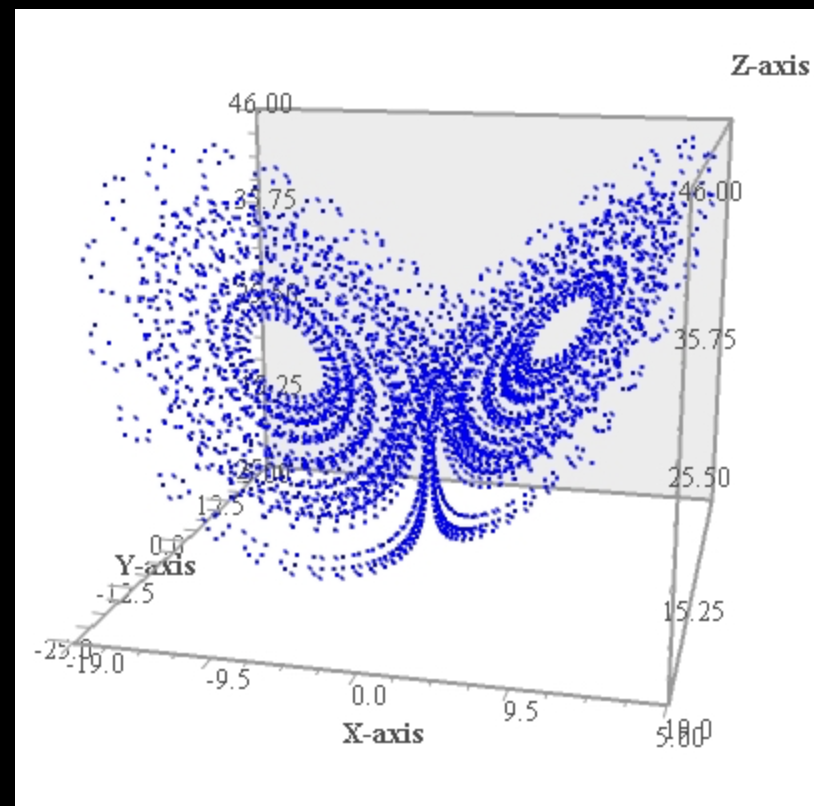

In [24]:
sigma = 10
rho = 28
beta = 8 / 3

dt  = 0.01
numSteps = 10000 

x0, y0, z0 = 1.0, 1.0, 1.0

xs = np.empty(numSteps)
ys = np.empty(numSteps)
zs = np.empty(numSteps)
xs[0], ys[0], zs[0] = x0, y0, z0

In [25]:
for i in range(1, numSteps):
    x, y, z = xs[i - 1], ys[i - 1], zs[i - 1]

    k1x = sigma * (y - x)
    k1y = x * (rho - z) - y
    k1z = x * y - beta * z

    k2x = sigma * ((y + 0.5 * dt * k1y) - (x + 0.5 * dt * k1x))
    k2y = (x + 0.5 * dt * k1x) * (rho - (z + 0.5 * dt * k1z)) - (y + 0.5 * dt * k1y)
    k2z = (x + 0.5 * dt * k1x) * (y + 0.5 * dt * k1y) - beta * (z + 0.5 * dt * k1z)

    k3x = sigma * ((y + 0.5 * dt * k2y) - (x + 0.5 * dt * k2x))
    k3y = (x + 0.5 * dt * k2x) * (rho - (z + 0.5 * dt * k2z)) - (y + 0.5 * dt * k2y)
    k3z = (x + 0.5 * dt * k2x) * (y + 0.5 * dt * k2y) - beta * (z + 0.5 * dt * k2z)

    k4x = sigma * ((y + dt * k3y) - (x + dt * k3x))
    k4y = (x + dt * k3x) * (rho - (z + dt * k3z)) - (y + dt * k3y)
    k4z = (x + dt * k3x) * (y + dt * k3y) - beta * (z + dt * k3z)

    xs[i] = x + (dt / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
    ys[i] = y + (dt / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
    zs[i] = z + (dt / 6) * (k1z + 2 * k2z + 2 * k3z + k4z)

In [26]:
data = pd.DataFrame({
    'X': xs,
    'Y': ys,
    'Z': zs
})

# Збереження DataFrame у CSV
data.to_csv('SystemLorenzo.csv', index=False)

print("Save file: 'SystemLorenzo.csv'.")

Save file: 'SystemLorenzo.csv'.


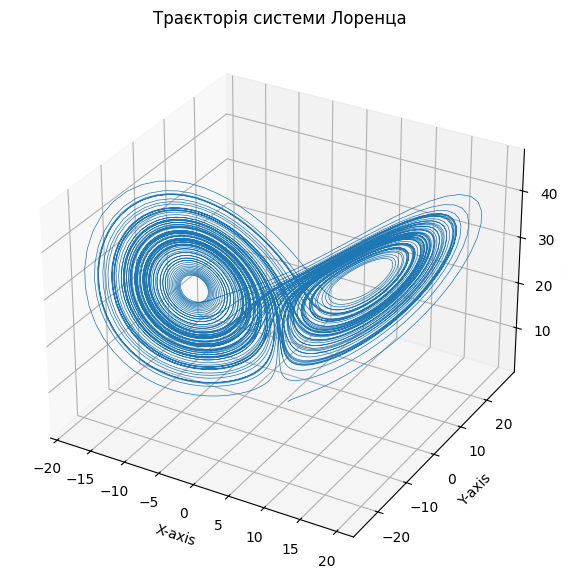

In [27]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, ys, zs, lw=0.5)
ax.set_title("Траєкторія системи Лоренца")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.show()

Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

1. згенерував три набори даних для системи лоренцо: 
   - перший набір: σ = 10, ρ = 28, β = 8/3
   - другий набір: σ = 14, ρ = 40, β = 3
   - третій набір: σ = 5, ρ = 20, β = 2

2.  - перший набір показує хаотичну траєкторією.
    - другий набір показує більш складну хаотичну поведінку траєкторії.
    - третій набір показує показує менш хаотичну, більш стабільну траєкторію (рух регулярний)